<a href="https://colab.research.google.com/github/julsales/JuCodes/blob/main/jsn_tcq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#PS: PRECISA salvar a api no seu docs pessoal antes de rodar, mas uma vez que ele salva não precisa salvar mais
from google.colab import drive
import os
import json
import requests as rq

drive.mount('/content/drive', force_remount=True)

def SalvarApi(url, nome_arquivo):
    pasta = "/content/drive/MyDrive/Dataset"
    os.makedirs(pasta, exist_ok=True)
    caminho_arquivo = os.path.join(pasta, nome_arquivo)

    response = rq.get(url)
    if response.status_code == 200:
        data = response.json()
        with open(caminho_arquivo, 'w') as f:
            json.dump(data, f, indent=4)
        print(f"Dados salvos em {caminho_arquivo}")
    else:
        print(f"Erro ({response.status_code}) ao acessar {url}")

SalvarApi("https://ps99.biggamesapi.io/api/exists", "pets_data.json")
SalvarApi("https://ps99.biggamesapi.io/api/rap", "rap_data.json")


Mounted at /content/drive
Dados salvos em /content/drive/MyDrive/Dataset/pets_data.json
Dados salvos em /content/drive/MyDrive/Dataset/rap_data.json


In [47]:
#Carregando os arquivos necessários
#Se já tiver a Api salva é só clicar aqui e em "Ambiente de Execução > Executar Célula e Abaixo"
import json
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


path = "/content/drive/MyDrive/Dataset"

arquivos = ["pets_data.json", "rap_data.json"]
dfs_iniciais = []
for arquivo in arquivos:
  caminho = f"{path}/{arquivo}"
  with open(caminho, 'r', encoding='utf-8') as f:
    data = json.load(f)
    data = data.get("data", data)
    df_criada = pd.DataFrame(data)
    dfs_iniciais.append(df_criada)

#Montando os dfs
#É normal demorar um pouco para carregar a tabela
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', '{:,.0f}'.format)

df_relev1 = dfs_iniciais[0].loc[dfs_iniciais[0]["category"] == "Pet"].copy()
df_relev2 = dfs_iniciais[1].loc[dfs_iniciais[1]["category"] == "Pet"].copy()
df_relev2.reset_index(drop=True, inplace=True)

df_relev1["Id"] = df_relev1["configData"].apply(lambda x: x.get("id", "Desconhecido"))
df_relev1["Raridade"] = df_relev1["configData"].apply(lambda x: str(x.get("pt", "0")))
df_relev1["Shiny"] = df_relev1["configData"].apply(lambda x: bool(x.get("sh", False)))
df_relev1.rename(columns={"value": "Existe"}, inplace=True)

df_relev2["Id"] = df_relev2["configData"].apply(lambda x: x.get("id", "Desconhecido"))
df_relev2["Raridade"] = df_relev2["configData"].apply(lambda x: str(x.get("pt", "0")))
df_relev2["Shiny"] = df_relev2["configData"].apply(lambda x: bool(x.get("sh", False)))
df_relev2.rename(columns={"value": "Valor"}, inplace=True)

raridade_nome = {
    "0": "Normal",
    "1": "Golden",
    "2": "Rainbow"
}

df_relev1["Raridade"] = df_relev1["Raridade"].replace(raridade_nome)
df_relev2["Raridade"] = df_relev2["Raridade"].replace(raridade_nome)

df_relev2_unico = df_relev2.drop_duplicates(subset=["Id", "Shiny", "Raridade"])

df = df_relev1.merge(df_relev2_unico[["Id", "Shiny","Raridade", "Valor"]], on=["Id", "Shiny", "Raridade"], how="left")
df = df.drop(columns=["configData","category"])
df["Tamanho"] = "Normal"
df.loc[df["Id"].str.contains("Huge"), "Tamanho"] = "Huge"
df.loc[df["Id"].str.contains("Titanic"), "Tamanho"] = "Titanic"
df.loc[df["Id"].str.contains("Gargantuan"), "Tamanho"] = "Gargantuan"
colunas = list(df.columns)
indice_raridade = colunas.index("Raridade")
colunas.remove("Tamanho")
colunas.insert(indice_raridade, "Tamanho")
df = df[colunas]
print("\nDados a serem analisados:\n")
df

Mounted at /content/drive

Dados a serem analisados:



Existe                              Id     Tamanho Raridade  \
0           211,223,397                          Turtle      Normal   Normal   
1               819,037                  Unicorn Dragon      Normal   Normal   
2           233,221,155                         Ladybug      Normal   Normal   
3            38,689,374                   Scarecrow Cat      Normal   Golden   
4           332,129,050                           Piggy      Normal   Normal   
5            66,624,431                           Llama      Normal   Normal   
6           268,958,840                   Ugly Duckling      Normal   Normal   
7            34,372,539                   Ugly Duckling      Normal   Golden   
8            85,366,451                        Hedgehog      Normal   Normal   
9             6,656,171                          Turtle      Normal  Rainbow   
10           34,403,137                         Ladybug      Normal   Golden   
11          297,753,562                   Scarecrow Cat      Normal   Normal   
12                  269                  Titanic Banana     Titanic   Normal   
13       15,068,371,909                           Corgi      Normal   Normal   
14               21,339           Huge Pink Balloon Cat        Huge   Normal   
15       15,059,408,962                             Cat      Normal   Normal   
16       15,059,221,504                             Dog      Normal   Normal   
17       15,070,866,812                         Axolotl      Normal   Normal   
18           27,352,161                         Axolotl      Normal   Normal   
19          181,100,510                            Bear      Normal   Normal   
20        1,962,792,303                           Bunny      Normal   Normal   
21          861,816,528                     White Bunny      Normal   Normal   
22          425,795,328                        Squirrel      Normal   Normal   
23          440,054,529                      Mining Dog      Normal   Normal   
24           41,474,592                      Mining Dog      Normal   Golden   
25          522,844,650                         Chicken      Normal   Normal   
26           18,657,883                      Happy Rock      Normal   Golden   
27          143,114,482                         Firefly      Normal   Normal   
28           63,310,739                          Dragon      Normal   Normal   
29          184,883,687                      Happy Rock      Normal   Normal   
30          389,386,063                        Platypus      Normal   Normal   
31          134,912,310                     Green Cobra      Normal   Normal   
32            3,637,106                     Willow Wisp      Normal  Rainbow   
33          220,757,548                             Bat      Normal   Normal   
34           47,358,990                     Willow Wisp      Normal   Normal   
35                1,902          Huge White Balloon Cat        Huge   Normal   
36            3,396,336                           Agony      Normal  Rainbow   
37          237,750,721                         Cyclops      Normal   Normal   
38              101,138                         Pop Cat      Normal   Normal   
39                   82              Titanic Hippomelon     Titanic   Normal   
40           55,753,109                           Agony      Normal   Normal   
41          237,748,114                           Slime      Normal   Normal   
42          858,564,379                       Dalmatian      Normal   Normal   
43           90,647,677                           Chick      Normal   Golden   
44              142,249                           Chick      Normal   Golden   
45           24,356,600                  Shadow Griffin      Normal   Golden   
46          362,957,163                             Bee      Normal   Normal   
47          124,374,196                        Flamingo      Normal   Normal   
48              290,285                       Knife Cat      Normal   Normal   
49          913,3

In [48]:
#variáveis úteis
total_pets = len(df)

total_pets_existentes = df["Existe"].sum()

def contar_pets(id=None, tamanho=None, raridade=None, shiny=None, valor_op=None, valor=None):
  #cria um filtro vazio baseado no df original
    filtro = pd.Series([True] * len(df))
    #e depois filtra por coluna
    if id is not None:
        filtro = filtro & df["Id"].str.contains(id)
    if tamanho is not None:
        filtro = filtro & (df["Tamanho"] == tamanho)
    if raridade is not None:
        filtro = filtro & (df["Raridade"] == raridade)
    if shiny is not None:
        filtro = filtro & (df["Shiny"] == shiny)
    if valor is not None:
        if valor_op is None or valor_op == "==":
          filtro = filtro & (df["Valor"] == valor)
        elif valor_op == ">":
            filtro = filtro & (df["Valor"] > valor)
        elif valor_op == ">=":
            filtro = filtro & (df["Valor"] >= valor)
        elif valor_op == "<":
            filtro = filtro & (df["Valor"] < valor)
        elif valor_op == "<=":
            filtro = filtro & (df["Valor"] <= valor)
        else:
            raise ValueError("Operador inválido. Use ==, >, >=, < ou <=")
    return {
        "unicos": filtro.sum(),
        "existentes": df.loc[filtro, "Existe"].sum()
    }

dados_normal = contar_pets(tamanho="Normal")
dados_huge = contar_pets(tamanho="Huge")
dados_titanic = contar_pets(tamanho="Titanic")
dados_gargantuan = contar_pets(tamanho="Gargantuan")

print(f"Total de Pets únicos existentes no momento da análise: {total_pets} pets")
print(f"Total de Pets existentes: {total_pets_existentes:,} pets\n")

print(f"Total de Pets únicos de tamanho Normal: {dados_normal['unicos']}")
print(f"Total de Pets únicos de tamanho Huge: {dados_huge['unicos']}")
print(f"Total de Pets únicos de tamanho Titanic: {dados_titanic['unicos']}")
print(f"Total de Pets únicos de tamanho Gargantuan: {dados_gargantuan['unicos']}\n")

print(f"Quantidade total de Pets Normais existentes: {dados_normal['existentes']:,}")
print(f"Quantidade total de Pets Huge existentes: {dados_huge['existentes']:,}")
print(f"Quantidade total de Pets Titanic existentes: {dados_titanic['existentes']:,}")
print(f"Quantidade total de Pets Gargantuan existentes: {dados_gargantuan['existentes']:,}")

Total de Pets únicos existentes no momento da análise: 10361 pets
Total de Pets existentes: 29,303,331,671,519.0 pets

Total de Pets únicos de tamanho Normal: 6693
Total de Pets únicos de tamanho Huge: 3113
Total de Pets únicos de tamanho Titanic: 527
Total de Pets únicos de tamanho Gargantuan: 28

Quantidade total de Pets Normais existentes: 29,303,296,965,439.0
Quantidade total de Pets Huge existentes: 34,575,220.0
Quantidade total de Pets Titanic existentes: 130,224.0
Quantidade total de Pets Gargantuan existentes: 636.0


In [49]:
#Probabilidade simples (Júlia)
print("\n Os pets Huge, Titanic e Gargantuan são os pets mais desejados do jogo")

prob_huge = (dados_huge['existentes'] / total_pets_existentes) * 100
print(f"\n Probabilidade de um certo pet ser Huge dentre todos os pets existentes no jogo = {prob_huge:.5f}%")

prob_titanic = (dados_titanic["existentes"] / total_pets_existentes) * 100
print(f"\n Probabilidade de um certo pet ser Titanic dentre todos os pets existentes no jogo = {prob_titanic:.8f}%")

prob_gargantuan = (dados_gargantuan["existentes"] / total_pets_existentes) * 100
print(f"\n Probabilidade de um certo pet ser Gargantuan dentre todos os pets existentes no jogo = {prob_gargantuan:.10f}%")



 Os pets Huge, Titanic e Gargantuan são os pets mais desejados do jogo

 Probabilidade de um certo pet ser Huge dentre todos os pets existentes no jogo = 0.00012%

 Probabilidade de um certo pet ser Titanic dentre todos os pets existentes no jogo = 0.00000044%

 Probabilidade de um certo pet ser Gargantuan dentre todos os pets existentes no jogo = 0.0000000022%


In [60]:
# Probabilidade com União (Thiago)

# Golden ou Rainbow
golden = contar_pets(raridade="Golden")["existentes"]
rainbow = contar_pets(raridade="Rainbow")["existentes"]
golden_or_rainbow = golden + rainbow
prob_golden_or_rainbow = (golden_or_rainbow / total_pets_existentes) * 100
print(f"\n Probabilidade de um pet ser Golden ou Rainbow: {prob_golden_or_rainbow :.2f}%")

# Huge ou Shiny
huge = contar_pets(tamanho="Huge")["existentes"]
shiny = contar_pets(shiny=True)["existentes"]
huge_or_shiny = huge + shiny
prob_huge_or_shiny = (huge_or_shiny / total_pets_existentes) * 100
print(f"\n Probabilidade de um pet ser Huge ou Shiny: {prob_huge_or_shiny:.2f}%")

# Titanic ou valor acima de X
X = 100_000_000
titanic = contar_pets(tamanho="Titanic")["existentes"]
valor_x = contar_pets(valor_op=">", valor=100_000_000)["existentes"]
titanic_or_valor_acima_x = titanic + valor_x
prob_titanic_or_valor_acima_x = (titanic_or_valor_acima_x / total_pets_existentes) * 100
print(f"\n Probabilidade de um pet ser Titanic ou ter valor acima de {X:,} diamonds: {prob_titanic_or_valor_acima_x:.5f}%")



 Probabilidade de um pet ser Golden ou Rainbow: 22.60%

 Probabilidade de um pet ser Huge ou Shiny: 0.50%

 Probabilidade de um pet ser Titanic ou ter valor acima de 100,000,000 diamonds: 0.00456%


In [51]:
#Probabilidade com intersseção (Júlia)
melhor_pet = contar_pets(tamanho="Gargantuan", raridade="Rainbow", shiny=True)
prob_melhor_pet = (melhor_pet["existentes"] / total_pets_existentes) * 100
print(f"\n Probabilidade de um certo pet ser o melhor tipo de pet do jogo (Gargantuan e Rainbow e Shiny) dentre todos os pets existentes no jogo = {prob_melhor_pet:.15f}%")

huges_baratos = contar_pets(tamanho="Huge", valor_op="<=", valor=30000000)
prob_huge_barato = (huges_baratos["existentes"] / dados_huge ["existentes"]) * 100
print(f"\n Probabilidade de um certo pet ser considerado um Huge barato (Huge e Valor <= 30M diamantes) dentre os huges existentes do jogo = {prob_huge_barato:.2f}%")

titanics_caros = contar_pets(tamanho="Titanic", valor_op=">=", valor=20000000000)
prob_titanic_caro = (titanics_caros["existentes"] / dados_titanic["existentes"]) * 100
print(f"\n Probabilidade de um certo pet ser considerado um Titanic caro (Titanic e Valor >= 20B diamantes) dentre os titanics existentes do jogo = {prob_titanic_caro:.2f}%")



 Probabilidade de um certo pet ser o melhor tipo de pet do jogo (Gargantuan e Rainbow e Shiny) dentre todos os pets existentes no jogo = 0.000000000003413%

 Probabilidade de um certo pet ser considerado um Huge barato (Huge e Valor <= 30M diamantes) dentre os huges existentes do jogo = 54.17%

 Probabilidade de um certo pet ser considerado um Titanic caro (Titanic e Valor >= 20B diamantes) dentre os titanics existentes do jogo = 15.10%


In [52]:
#Probabilidade com Complemento/Diferença (Thiago)
pets_nao_shiny=contar_pets(shiny=False)['existentes']
prob_nao_shiny=(pets_nao_shiny/total_pets_existentes) * 100
print(f"\n Probabilidade de não ser Shiny: {prob_nao_shiny:.5f}%")

pets_nao_huge=total_pets_existentes-dados_huge['existentes']
prob_nao_huge=(pets_nao_huge/total_pets_existentes) * 100
print(f"\n Probabilidade de não ser Huge: {prob_nao_huge:.5f}%")

titanic_nao_golden = dados_titanic['existentes'] - contar_pets(tamanho='Titanic', raridade='Golden')['existentes']
prob_titanic_nao_golden = (titanic_nao_golden / dados_titanic['existentes']) * 100
print(f"\n Titanic mas não Golden: {prob_titanic_nao_golden:.2f}%")



 Probabilidade de não ser Shiny: 99.50038%

 Probabilidade de não ser Huge: 99.99988%

 Titanic mas não Golden: 90.58%


In [53]:
#Probabilidade Condicional (Júlia)
dados_rainbow = contar_pets(raridade="Rainbow")
dados_shiny_rainbow = contar_pets(raridade="Rainbow", shiny=True)
prob_shiny_dado_rainbow = (dados_shiny_rainbow["existentes"] / dados_rainbow["existentes"]) * 100
print(f"\n Probabilidade de ser Shiny dado que é Rainbow: {prob_shiny_dado_rainbow:.2f}%")

dados_shiny_titanic = contar_pets(tamanho="Titanic", shiny=True)
prob_shiny_dado_titanic = (dados_shiny_titanic["existentes"] / dados_titanic["existentes"]) * 100
print(f"\n Probabilidade de ser Shiny dado que é Titanic: {prob_shiny_dado_titanic:.2f}%")

dados_valor_maior_1B_huge = contar_pets(tamanho="Huge", valor_op=">", valor=1000000000)
prob_valor_maior_1B_dado_huge = (dados_valor_maior_1B_huge["existentes"] / dados_huge["existentes"]) * 100
print(f"\n Probabilidade de ter valor > 1B dado que é Huge: {prob_valor_maior_1B_dado_huge:.2f}%")



 Probabilidade de ser Shiny dado que é Rainbow: 1.02%

 Probabilidade de ser Shiny dado que é Titanic: 1.80%

 Probabilidade de ter valor > 1B dado que é Huge: 0.48%


In [54]:
#Teorema de Bayes (Thiago)

# Dado que o pet vale mais de 50M diamonds, qual a chance de ele ser Titanic?
valor_acima_50m = contar_pets(valor_op=">", valor=50_000_000)["existentes"]
titanic_e_valor_acima_50m = contar_pets(tamanho="Titanic", valor_op=">", valor=50_000_000)["existentes"]
prob_titanic_dado_valor_acima_50m = (titanic_e_valor_acima_50m / valor_acima_50m) * 100
print(f"\n Dado que o pet vale mais de 50M diamonds, qual a chance de ele ser Titanic?: {prob_titanic_dado_valor_acima_50m:.4f}%")

# Dado que o pet é Golden, qual a chance de ele ser Shiny?
golden = contar_pets(raridade="Golden")["existentes"]
golden_e_shiny = contar_pets(raridade="Golden", shiny=True)["existentes"]
prob_shiny_dado_golden = (golden_e_shiny / golden) * 100
print(f"\n Dado que o pet é Golden, qual a chance de ele ser Shiny?: {prob_shiny_dado_golden:.2f}%")

# Dado que o pet é barato (abaixo de 30M), qual a chance de ele ser Normal e não Shiny?
valor_abaixo_30m = contar_pets(valor_op="<", valor=30_000_000)["existentes"]
normal_e_nao_shiny_abaixo_30m = contar_pets(tamanho="Normal", shiny=False, valor_op="<", valor=30_000_000)["existentes"]
prob_normal_nao_shiny_dado_barato = (normal_e_nao_shiny_abaixo_30m / valor_abaixo_30m) * 100
print(f"\n Dado que o pet é barato (abaixo de 30M), qual a chance de ele ser Normal e não Shiny?: {prob_normal_nao_shiny_dado_barato:.2f}%")


 Dado que o pet vale mais de 50M diamonds, qual a chance de ele ser Titanic?: 0.0029%

 Dado que o pet é Golden, qual a chance de ele ser Shiny?: 0.73%

 Dado que o pet é barato (abaixo de 30M), qual a chance de ele ser Normal e não Shiny?: 99.50%


In [55]:
# Definição de novas variáveis aleatórias
df_variaveis = df.copy()

mapa_tamanho = {
    'Normal': 0,
    'Huge': 1,
    'Titanic': 2,
    'Gargantuan': 3
}

mapa_bool = {
    True: 1,
    False: 0
}

df_variaveis['X_tamanho'] = df_variaveis['Tamanho'].map(mapa_tamanho)
df_variaveis['Y_shiny'] = df_variaveis['Shiny'].map(mapa_bool)

# Funções de Probabilidade
def probabilidade(df, coluna):
    dist = df.groupby(coluna)["Existe"].sum()
    dist /= dist.sum()
    return dist.sort_index()

dist_X = probabilidade(df_variaveis, 'X_tamanho')
dist_Y = probabilidade(df_variaveis, 'Y_shiny')

# Funções de Repartição (cumulativa)
def reparticao(dist):
    return dist.cumsum()

cdf_X = reparticao(dist_X)
cdf_Y = reparticao(dist_Y)


print("\nDistribuição de P(X = x):")
print(dist_X.to_string(float_format='{:.12f}'.format))

print("\nDistribuição de P(Y = y):")
print(dist_Y.to_string(float_format='{:.5f}'.format))

print("\nFunção de Repartição F(X ≤ x):")
print(cdf_X.to_string(float_format='{:.12f}'.format))

print("\nFunção de Repartição F(Y ≤ y):")
print(cdf_Y.to_string(float_format='{:.5f}'.format))



Distribuição de P(X = x):
X_tamanho
0   0.999998815627
1   0.000001179907
2   0.000000004444
3   0.000000000022

Distribuição de P(Y = y):
Y_shiny
0   0.99500
1   0.00500

Função de Repartição F(X ≤ x):
X_tamanho
0   0.999998815627
1   0.999999995534
2   0.999999999978
3   1.000000000000

Função de Repartição F(Y ≤ y):
Y_shiny
0   0.99500
1   1.00000


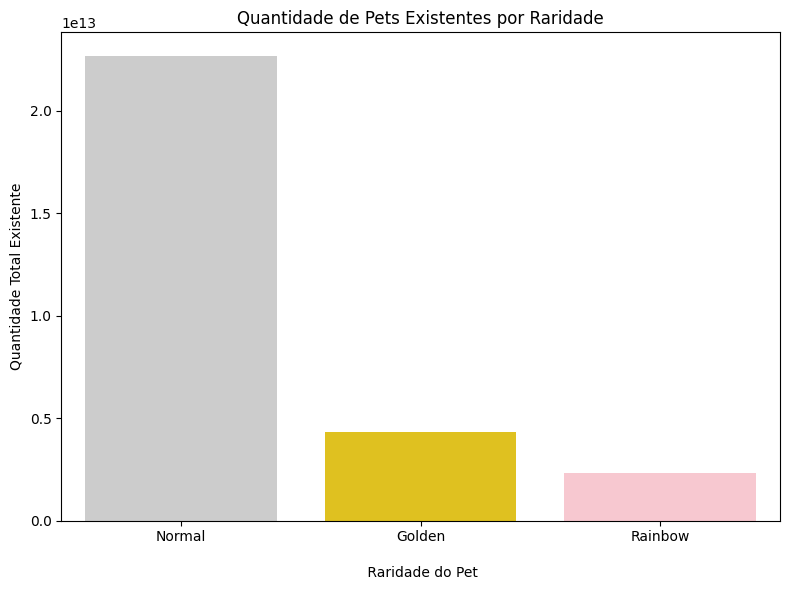

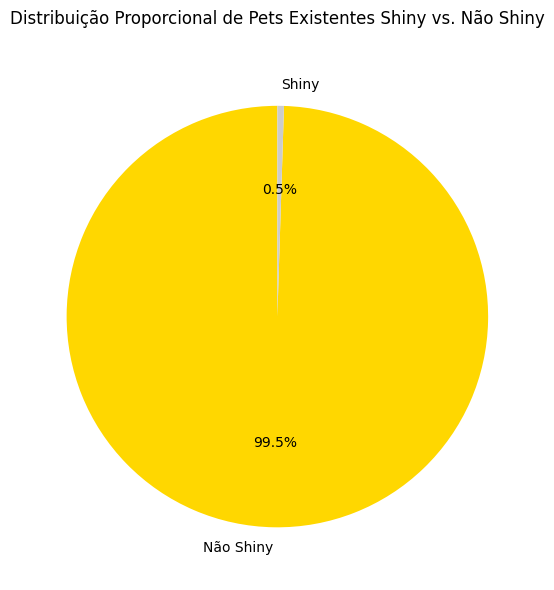

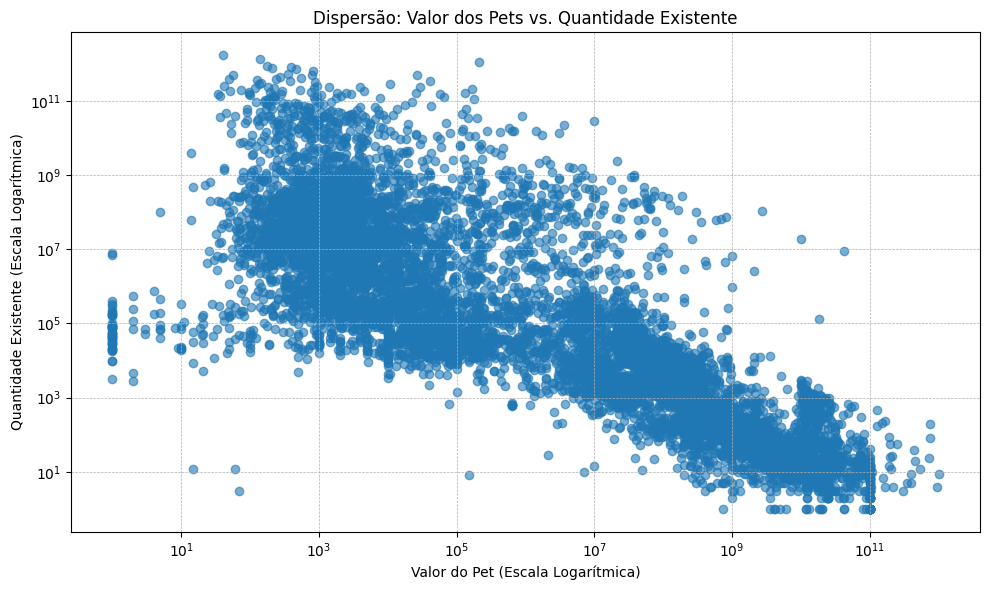

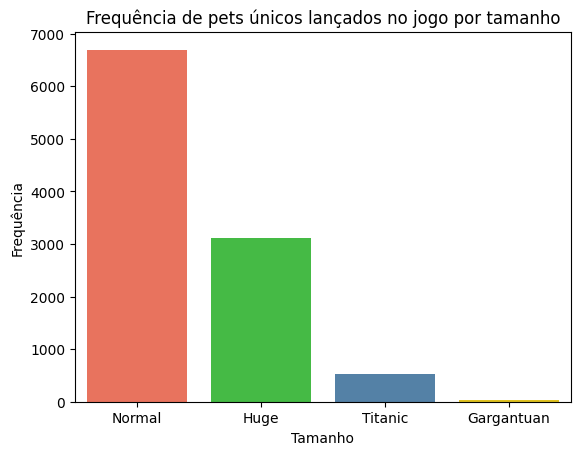

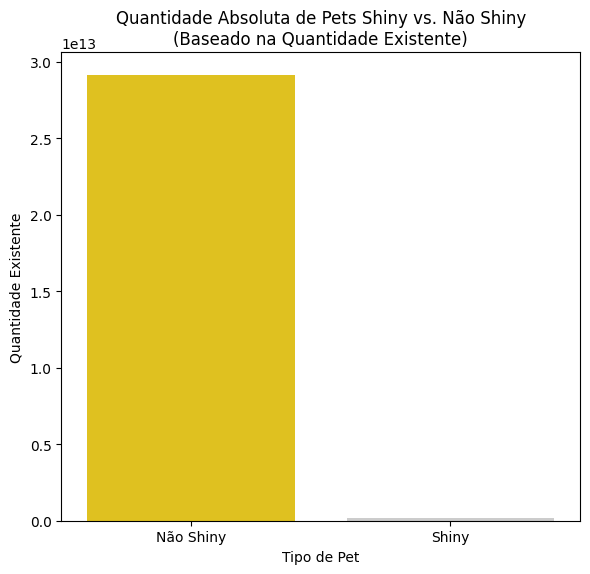

In [56]:
# Gráficos (Thiago)

import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras: Existentes por Raridade
raridade_existentes = df.groupby("Raridade")["Existe"].sum().sort_values()
plt.figure(figsize=(8, 6))
sns.barplot(
    x=raridade_existentes.index,
    y=raridade_existentes.values,
    order = ['Normal', 'Golden', 'Rainbow'],
    hue=raridade_existentes.index,
    palette=["#FFC0CB","#FFD700", "#CCCCCC"],
    legend=False
    )
plt.title("Quantidade de Pets Existentes por Raridade")
plt.xlabel("\n Raridade do Pet")
plt.ylabel("Quantidade Total Existente")
plt.tight_layout()
plt.show()
print("\n")

# Gráfico de pizza: Proporção Shiny vs Não Shiny (baseado em existentes)
mapa_shiny = {
    True: "Shiny",
    False: "Não Shiny"
    }
shiny_existentes = df.groupby("Shiny")["Existe"].sum().rename(index=mapa_shiny)
plt.figure(figsize=(6, 6))
shiny_existentes.plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors=["#FFD700", "#CCCCCC"]
    )
plt.title("Distribuição Proporcional de Pets Existentes Shiny vs. Não Shiny\n")
plt.ylabel("")
plt.tight_layout()
plt.show()
print("\n")

# Gráfico de dispersão: Valor dos pets vs. quantidade existente
plt.figure(figsize=(10, 6))
plt.scatter(df["Valor"], df["Existe"], alpha=0.6)
plt.xscale("log")  # Valor dos pets em escala logarítmica
plt.yscale("log")  # Quantidade existente em escala logarítmica
plt.title("Dispersão: Valor dos Pets vs. Quantidade Existente")
plt.xlabel("Valor do Pet (Escala Logarítmica)")
plt.ylabel("Quantidade Existente (Escala Logarítmica)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()
print("\n")

# Gráfico de barras: Frequência de pets únicos lançados no jogo por tamanho
sns.countplot(
    x="Tamanho",
    data=df,
    order= ['Normal', 'Huge', 'Titanic', 'Gargantuan'],
    palette=['#FF6347', '#4682B4', '#32CD32', '#FFD700'],
    hue="Tamanho"
    )
plt.title("Frequência de pets únicos lançados no jogo por tamanho")
plt.xlabel("Tamanho")
plt.ylabel("Frequência")
plt.show()
print("\n")

# Gráfico de barras: Shiny vs Não Shiny (existentes)
plt.figure(figsize=(6, 6))
sns.barplot(
    x=shiny_existentes.index,
    y=shiny_existentes.values,
    hue=shiny_existentes.index,
    palette=["#FFD700", "#CCCCCC"],
    legend=False
)
plt.title("Quantidade Absoluta de Pets Shiny vs. Não Shiny\n(Baseado na Quantidade Existente)")
plt.xlabel("Tipo de Pet")
plt.ylabel("Quantidade Existente")
plt.tight_layout()
plt.show()


In [57]:
#Variância e Desvio Padrão (Júlia)
quantidades_existentes = [
    dados_normal["existentes"],
    dados_huge["existentes"],
    dados_titanic["existentes"],
    dados_gargantuan["existentes"]
]

variancia = np.var(quantidades_existentes)
desvio_padrao = np.sqrt(variancia)

print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")

Variância: 161002975320784954728644608.00
Desvio Padrão: 12688694783971.48


In [58]:
# Correlação e Covariância
df_cov_corr = df.copy()
mapa_raridade = {
    "Normal": 0,
    "Golden": 1,
    "Rainbow": 2
}
mapa_tamanho = {
    "Normal": 0,
    "Huge": 1,
    "Titanic": 2,
    "Gargantuan": 3
}

df_cov_corr["Raridade_num"] = df_cov_corr["Raridade"].map(mapa_raridade)
df_cov_corr["Tamanho_num"] = df_cov_corr["Tamanho"].map(mapa_tamanho)

# Removendo NaNs
df_cov_corr = df_cov_corr.dropna(subset=["Valor", "Raridade_num", "Tamanho_num"])

# Covariânciaf
cov_valor_raridade = df_cov_corr["Valor"].cov(df_cov_corr["Raridade_num"])
print(f"\n Covariância entre valor do pet e raridade: {cov_valor_raridade:.2f}")

cov_valor_tamanho = df_cov_corr["Valor"].cov(df_cov_corr["Tamanho_num"])
print(f"\n Covariância entre valor e o seu tamanho: {cov_valor_tamanho:.2f}")

# Correlação

corr_valor_raridade = df_cov_corr["Valor"].corr(df_cov_corr["Raridade_num"])
print(f"\n Correlação entre valor do pet e raridade: {corr_valor_raridade:.2f}")

corr_valor_tamanho = df_cov_corr["Valor"].corr(df_cov_corr["Tamanho_num"])
print(f"\n Correlação entre valor do pet e o seu tamanho: {corr_valor_tamanho:.2f}")




 Covariância entre valor do pet e raridade: 808163274.43

 Covariância entre valor e o seu tamanho: 4482482294.60

 Correlação entre valor do pet e raridade: 0.04

 Correlação entre valor do pet e o seu tamanho: 0.30
